# Analyse préliminaire du jeu de données

In [2]:
import pandas as pd
Netflix_df = pd.read_csv("netflix_titles.csv")

In [3]:
Netflix_df.columns.tolist()

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

In [4]:
print(Netflix_df.head())

  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4   

In [5]:
print(Netflix_df.tail())

     show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783        

In [6]:
Netflix_df_sample = Netflix_df.copy()

In [7]:
Netflix_df_sample.drop(["show_id", "cast", "release_year", "rating", "listed_in", "description"], axis = 1, inplace = True)

In [8]:
Netflix_df_sample

,type,title,director,country,date_added,duration
0,TV Show,3%,NaN,Brazil,"August 14, 2020",4 Seasons
1,Movie,7:19,Jorge Michel Grau,Mexico,"December 23, 2016",93 min
2,Movie,23:59,Gilbert Chan,Singapore,"December 20, 2018",78 min
3,Movie,9,Shane Acker,United States,"November 16, 2017",80 min
4,Movie,21,Robert Luketic,United States,"January 1, 2020",123 min
...,...,...,...,...,...,...
7782,Movie,Zozo,Josef Fares,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",99 min
7783,Movie,Zubaan,Mozez Singh,India,"March 2, 2019",111 min
7784,Movie,Zulu Man in Japan,NaN,NaN,"September 25, 2020",44 min
7785,TV Show,Zumbo's Just Desserts,NaN,Australia,"October 31, 2020",1 Season


# Les 3 pays les plus importants en terme de production de contenus

In [9]:
Netflix_df_sample["country"].value_counts()[:3].to_dict()

{'United States': 2555, 'India': 923, 'United Kingdom': 397}

# Nombre de films ajouté au catalogue par année

In [10]:
Filter_movie = Netflix_df_sample["type"] == "Movie"

In [48]:
Netflix_df_sample_movie = Netflix_df_sample[Filter_movie]
Netflix_df_sample_movie

,type,title,director,country,date_added,duration
1,Movie,7:19,Jorge Michel Grau,Mexico,"December 23, 2016",93 min
2,Movie,23:59,Gilbert Chan,Singapore,"December 20, 2018",78 min
3,Movie,9,Shane Acker,United States,"November 16, 2017",80 min
4,Movie,21,Robert Luketic,United States,"January 1, 2020",123 min
6,Movie,122,Yasir Al Yasiri,Egypt,"June 1, 2020",95 min
...,...,...,...,...,...,...
7781,Movie,Zoom,Peter Hewitt,United States,"January 11, 2020",88 min
7782,Movie,Zozo,Josef Fares,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",99 min
7783,Movie,Zubaan,Mozez Singh,India,"March 2, 2019",111 min
7784,Movie,Zulu Man in Japan,NaN,NaN,"September 25, 2020",44 min


In [12]:
Netflix_df_sample_movie.dtypes

type          object
title         object
director      object
country       object
date_added    object
duration      object
dtype: object

#On peut voir que les valeurs de la colonne "date_added" ne sont ni des entiers ni des flottants. Le type "object" indique que ce sont sûrement des valeurs de type "str"

In [13]:
Netflix_df_sample_movie["date_added"].notnull().all()

True

#Donc la colonne "date_added" ne contient pas de valeurs manquantes NaN

In [14]:
Netflix_df_sample_movie

,type,title,director,country,date_added,duration
1,Movie,7:19,Jorge Michel Grau,Mexico,"December 23, 2016",93 min
2,Movie,23:59,Gilbert Chan,Singapore,"December 20, 2018",78 min
3,Movie,9,Shane Acker,United States,"November 16, 2017",80 min
4,Movie,21,Robert Luketic,United States,"January 1, 2020",123 min
6,Movie,122,Yasir Al Yasiri,Egypt,"June 1, 2020",95 min
...,...,...,...,...,...,...
7781,Movie,Zoom,Peter Hewitt,United States,"January 11, 2020",88 min
7782,Movie,Zozo,Josef Fares,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",99 min
7783,Movie,Zubaan,Mozez Singh,India,"March 2, 2019",111 min
7784,Movie,Zulu Man in Japan,NaN,NaN,"September 25, 2020",44 min


In [15]:
Netflix_df_sample_movie.dropna(subset=["date_added"])

,type,title,director,country,date_added,duration
1,Movie,7:19,Jorge Michel Grau,Mexico,"December 23, 2016",93 min
2,Movie,23:59,Gilbert Chan,Singapore,"December 20, 2018",78 min
3,Movie,9,Shane Acker,United States,"November 16, 2017",80 min
4,Movie,21,Robert Luketic,United States,"January 1, 2020",123 min
6,Movie,122,Yasir Al Yasiri,Egypt,"June 1, 2020",95 min
...,...,...,...,...,...,...
7781,Movie,Zoom,Peter Hewitt,United States,"January 11, 2020",88 min
7782,Movie,Zozo,Josef Fares,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",99 min
7783,Movie,Zubaan,Mozez Singh,India,"March 2, 2019",111 min
7784,Movie,Zulu Man in Japan,NaN,NaN,"September 25, 2020",44 min


#Cela confirme que la colonne "date_added" ne contient pas de valeurs manquantes car même en supprimant les lignes de la colonne "date_added" contenant des valeurs NaN,
le nombre de lignes de notre DataFrame ne change pas

#Deux méthodes sont possibles pour extraire l'année de la colonne "date_added"

#Méthode 1 en conservant le type "str" des valeurs de la colonne "date_added"

In [28]:
Netflix_df_sample_movie["date_added"].str.split(pat=",", expand = True)

,0,1
1,December 23,2016
2,December 20,2018
3,November 16,2017
4,January 1,2020
6,June 1,2020
...,...,...
7781,January 11,2020
7782,October 19,2020
7783,March 2,2019
7784,September 25,2020


In [53]:
Netflix_df_sample_movie["year_added"] = Netflix_df_sample_movie["date_added"].str.split(pat=",", expand = True)[1]
Netflix_df_sample_movie

C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,type,title,director,country,date_added,duration,year_added
1,Movie,7:19,Jorge Michel Grau,Mexico,"December 23, 2016",93 min,2016
2,Movie,23:59,Gilbert Chan,Singapore,"December 20, 2018",78 min,2018
3,Movie,9,Shane Acker,United States,"November 16, 2017",80 min,2017
4,Movie,21,Robert Luketic,United States,"January 1, 2020",123 min,2020
6,Movie,122,Yasir Al Yasiri,Egypt,"June 1, 2020",95 min,2020
...,...,...,...,...,...,...,...
7781,Movie,Zoom,Peter Hewitt,United States,"January 11, 2020",88 min,2020
7782,Movie,Zozo,Josef Fares,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",99 min,2020
7783,Movie,Zubaan,Mozez Singh,India,"March 2, 2019",111 min,2019
7784,Movie,Zulu Man in Japan,NaN,NaN,"September 25, 2020",44 min,2020


In [51]:
Netflix_df_sample_movie.groupby("year_added")["type"].count().sort_index(ascending=False)

year_added
 2021      88
 2020    1312
 2019    1497
 2018    1255
 2017     864
 2016     258
 2015      58
 2014      19
 2013       6
 2012       3
 2011      13
 2010       1
 2009       2
 2008       1
Name: type, dtype: int64

<AxesSubplot:title={'center':'Number of movie added to the library each year'}, xlabel='Year added', ylabel='Number of content'>

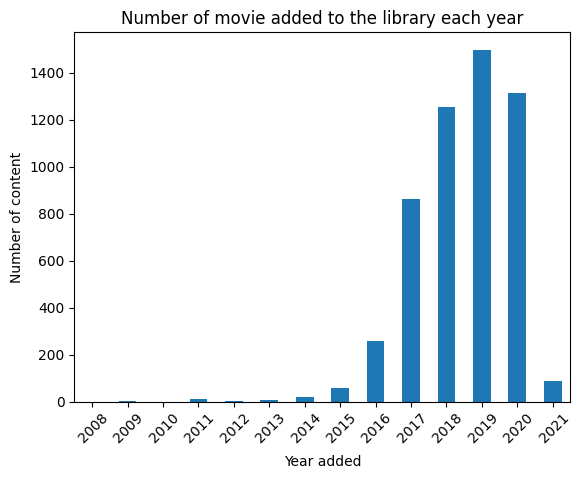

In [52]:
Netflix_df_sample_movie.groupby("year_added")["type"].count().plot.bar(rot = 45, title = "Number of movie added to the library each year", xlabel = "Year added", ylabel = "Number of content")

#Méthode 2 on convertit les valeurs de la colonne "date_added" au format datetime

In [56]:
Netflix_df_sample_movie["datetime_added"] = pd.to_datetime(Netflix_df_sample_movie["date_added"])

C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
Netflix_df_sample_movie

,type,title,director,country,date_added,duration,year_added,datetime_added
1,Movie,7:19,Jorge Michel Grau,Mexico,"December 23, 2016",93 min,2016,2016-12-23
2,Movie,23:59,Gilbert Chan,Singapore,"December 20, 2018",78 min,2018,2018-12-20
3,Movie,9,Shane Acker,United States,"November 16, 2017",80 min,2017,2017-11-16
4,Movie,21,Robert Luketic,United States,"January 1, 2020",123 min,2020,2020-01-01
6,Movie,122,Yasir Al Yasiri,Egypt,"June 1, 2020",95 min,2020,2020-06-01
...,...,...,...,...,...,...,...,...
7781,Movie,Zoom,Peter Hewitt,United States,"January 11, 2020",88 min,2020,2020-01-11
7782,Movie,Zozo,Josef Fares,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",99 min,2020,2020-10-19
7783,Movie,Zubaan,Mozez Singh,India,"March 2, 2019",111 min,2019,2019-03-02
7784,Movie,Zulu Man in Japan,NaN,NaN,"September 25, 2020",44 min,2020,2020-09-25


In [58]:
Netflix_df_sample_movie["year_added_2"] = Netflix_df_sample_movie["datetime_added"].dt.year

C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#On extrait l'année de nos dates au format datetime à l'aide de l'instruction ".dt.year"

In [41]:
Netflix_df_sample_movie

,type,title,director,country,date_added,duration,year_added,datetime_added,year_added_2
1,Movie,7:19,Jorge Michel Grau,Mexico,"December 23, 2016",93 min,2016,2016-12-23,2016
2,Movie,23:59,Gilbert Chan,Singapore,"December 20, 2018",78 min,2018,2018-12-20,2018
3,Movie,9,Shane Acker,United States,"November 16, 2017",80 min,2017,2017-11-16,2017
4,Movie,21,Robert Luketic,United States,"January 1, 2020",123 min,2020,2020-01-01,2020
6,Movie,122,Yasir Al Yasiri,Egypt,"June 1, 2020",95 min,2020,2020-06-01,2020
...,...,...,...,...,...,...,...,...,...
7781,Movie,Zoom,Peter Hewitt,United States,"January 11, 2020",88 min,2020,2020-01-11,2020
7782,Movie,Zozo,Josef Fares,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",99 min,2020,2020-10-19,2020
7783,Movie,Zubaan,Mozez Singh,India,"March 2, 2019",111 min,2019,2019-03-02,2019
7784,Movie,Zulu Man in Japan,NaN,NaN,"September 25, 2020",44 min,2020,2020-09-25,2020


In [60]:
Netflix_df_sample_movie.groupby("year_added_2")["type"].count().sort_index(ascending=False)

year_added_2
2021      88
2020    1312
2019    1497
2018    1255
2017     864
2016     258
2015      58
2014      19
2013       6
2012       3
2011      13
2010       1
2009       2
2008       1
Name: type, dtype: int64

<AxesSubplot:title={'center':'Number of movie added to the library each year'}, xlabel='Year added', ylabel='Number of content'>

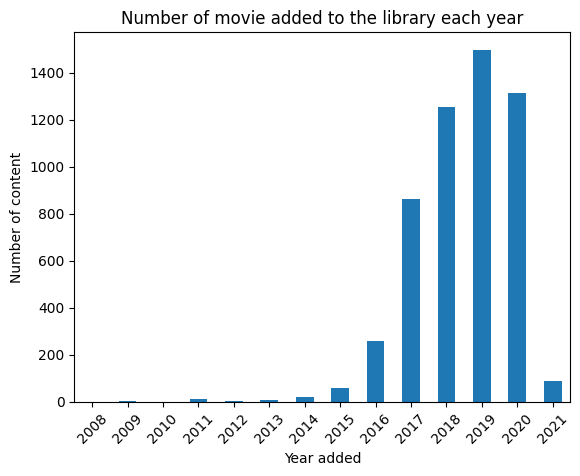

In [47]:
Netflix_df_sample_movie.groupby("year_added_2")["type"].count().plot.bar( rot = 45, title = "Number of movie added to the library each year", xlabel = "Year added", ylabel = "Number of content")

# Liste de tous les réalisateurs

In [32]:
Netflix_df_sample["director"].dropna().unique().tolist()[:5]

['Jorge Michel Grau',
 'Gilbert Chan',
 'Shane Acker',
 'Robert Luketic',
 'Serdar Akar']

# Durée moyenne des films

In [34]:
Filter_duration_min = Netflix_df_sample["duration"].str.contains("min")

In [35]:
Netflix_df_duration = Netflix_df_sample[Filter_duration_min]["duration"]

In [36]:
print(Netflix_df_duration)

1        93 min
2        78 min
3        80 min
4       123 min
6        95 min
         ...   
7781     88 min
7782     99 min
7783    111 min
7784     44 min
7786     90 min
Name: duration, Length: 5377, dtype: object


In [37]:
Netflix_df_duration.str.replace("min", "").map(int).mean()

99.30797842663195